---------------------------------------------------------------------------------------------------------------------------------
## Importing the Dataset




In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
diabetesData = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
diabetesData.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
diabetesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

Observations made from a quick glance:
* There are `21` variables and `70692` samples in the dataset.
* All the variables are identified as `float64`, even though there exists `boolean` type data (Diabetes_binary, PhysActivity etc.)
* None of the variables seem to have any missing value.

In [4]:
diabetesData.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

It is confirmed that none of the variables have missing values.

In [5]:
diabetesData.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<Axes: >

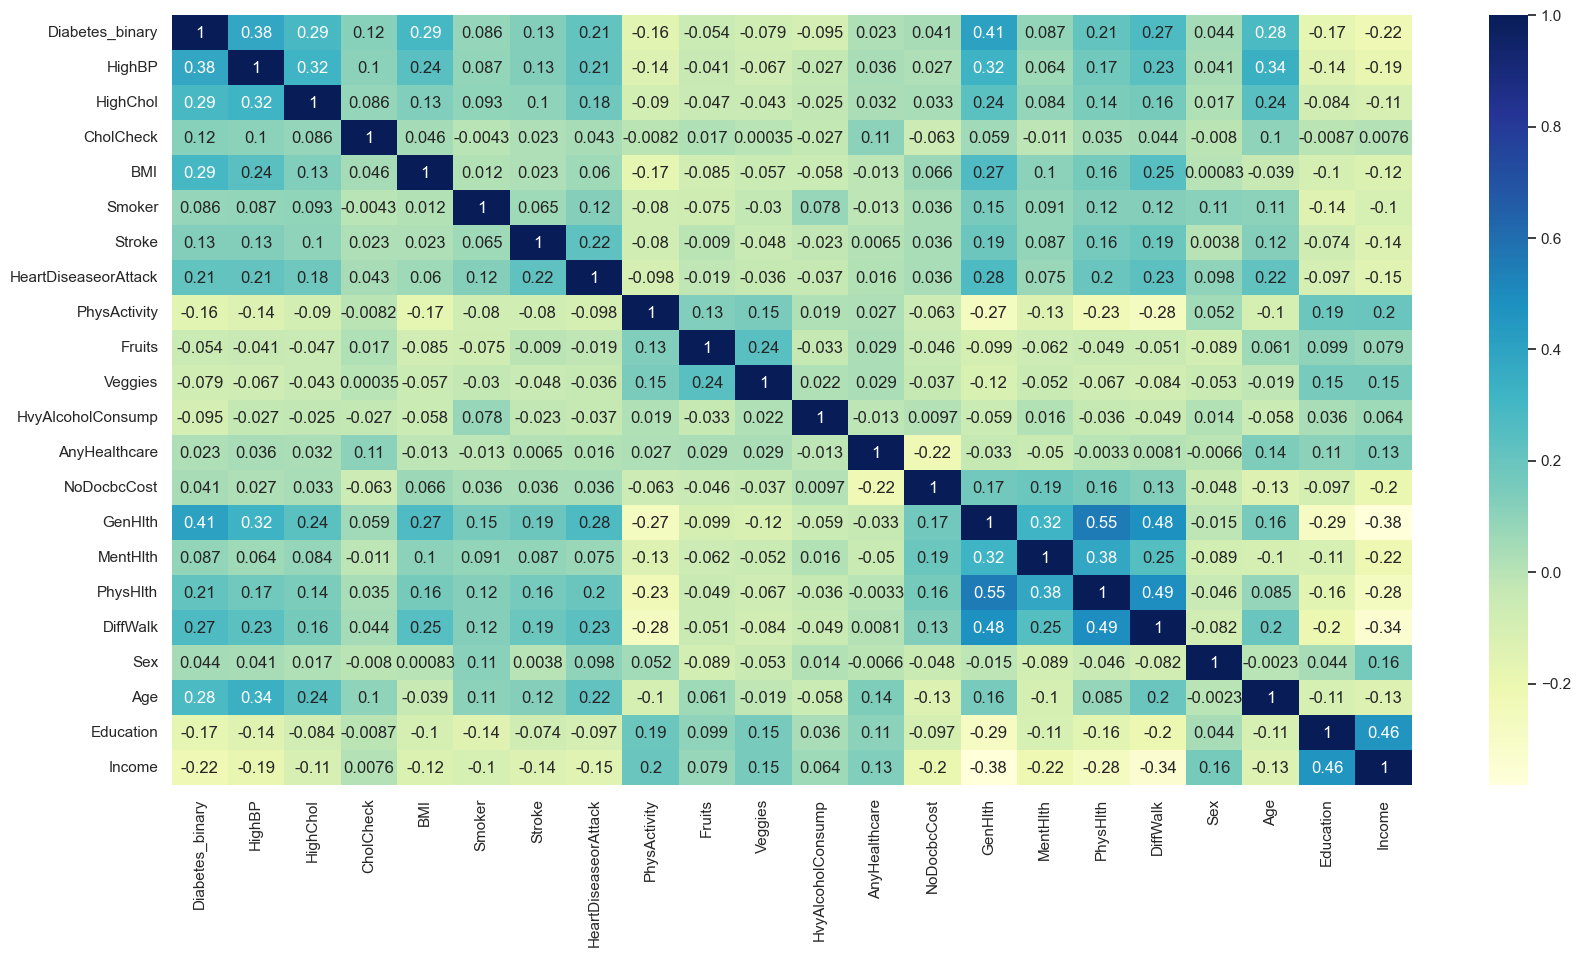

In [103]:
plt.figure(figsize=(20,10))
sb.heatmap(diabetesData.corr(), annot=True, cmap="YlGnBu")

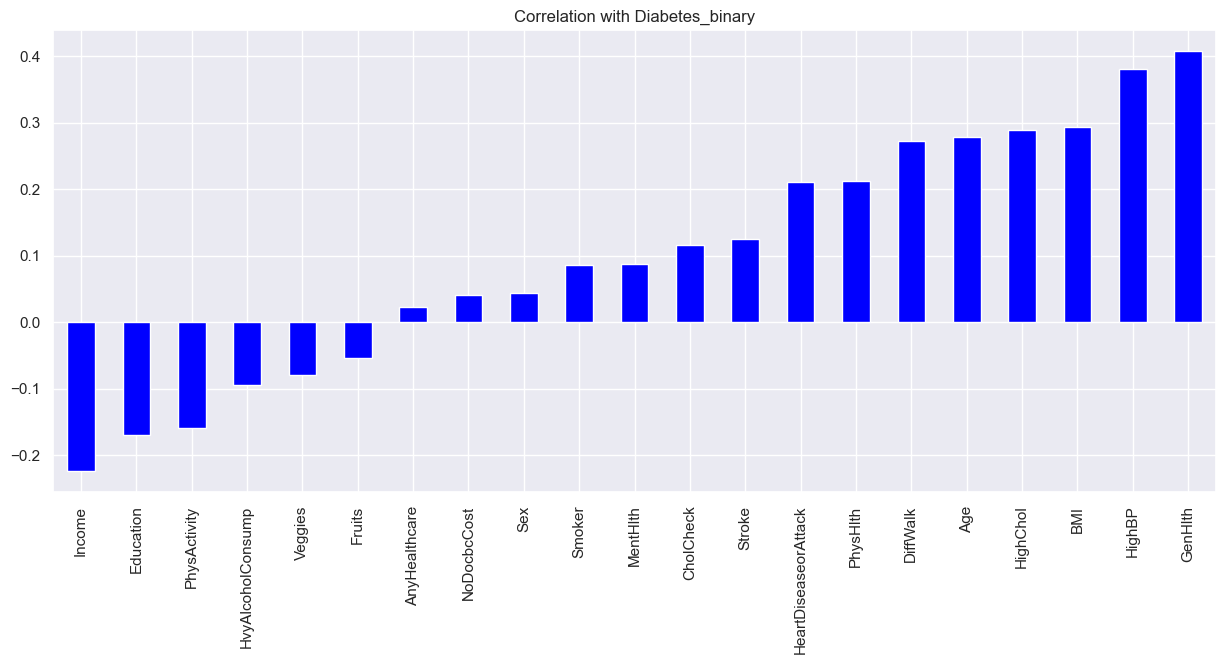

In [6]:
diabetesData.drop('Diabetes_binary', axis=1).corrwith(diabetesData.Diabetes_binary).sort_values().plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlation with Diabetes_binary",color="blue");

Significant Risk Factors (correlation coefficient > |0.2|)
- GenHealth (most significant)
- HighBP
- BMI
- HighChol
- Age
- Income
- DiffWalk 
- PhysHealth 

In [7]:
numeric_data = pd.DataFrame(diabetesData[['Diabetes_binary', 'BMI', 'PhysHlth']])
binary_data = pd.DataFrame(diabetesData[['Diabetes_binary', 'HighBP', 'HighChol','DiffWalk']])
oneHot_data = pd.DataFrame(diabetesData[['Diabetes_binary', 'GenHlth', 'Age', 'Income']])

In [8]:
binary_data.replace([1.0 ,0.0], [True, False], inplace = True)


In [9]:
binary_data.head()

,Diabetes_binary,HighBP,HighChol,DiffWalk
0,False,True,False,False
1,False,True,True,False
2,False,False,False,False
3,False,True,True,False
4,False,False,False,False


categorical data
1. one hot encoding - explain the encoding and do correlation
2. binary

---------------------------------------------------------------------------------------------------------------------------------

## Exploratory Data Analysis - Numerical Data

dataframe with numeric data

#transform data
df.Diabetes_binary[df['Diabetes_binary'] == 0.0] = 'No Diabetes'
df.Diabetes_binary[df['Diabetes_binary'] == 1.0] = 'Pre Diabetes/Diabetes'

df.HighBP[df['HighBP'] == 0] = 'No High'
df.HighBP[df['HighBP'] == 1] = 'High BP'

df.HighChol[df['HighChol'] == 0] = 'No High Cholesterol'
df.HighChol[df['HighChol'] == 1] = 'High Cholesterol'

df.CholCheck[df['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df.CholCheck[df['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df.Smoker[df['Smoker'] == 0] = 'No'
df.Smoker[df['Smoker'] == 1] = 'Yes'

df.Stroke[df['Stroke'] == 0] = 'No'
df.Stroke[df['Stroke'] == 1] = 'Yes'

df.HeartDiseaseorAttack[df['HeartDiseaseorAttack'] == 0] = 'No'
df.HeartDiseaseorAttack[df['HeartDiseaseorAttack'] == 1] = 'Yes'

df.PhysActivity[df['PhysActivity'] == 0] = 'No'
df.PhysActivity[df['PhysActivity'] == 1] = 'Yes'

df.Fruits[df['Fruits'] == 0] = 'No'
df.Fruits[df['Fruits'] == 1] = 'Yes'

df.Veggies[df['Veggies'] == 0] = 'No'
df.Veggies[df['Veggies'] == 1] = 'Yes'

df.HvyAlcoholConsump[df['HvyAlcoholConsump'] == 0] = 'No'
df.HvyAlcoholConsump[df['HvyAlcoholConsump'] == 1] = 'Yes'

df.AnyHealthcare[df['AnyHealthcare'] == 0] = 'No'
df.AnyHealthcare[df['AnyHealthcare'] == 1] = 'Yes'

df.NoDocbcCost[df['NoDocbcCost'] == 0] = 'No'
df.NoDocbcCost[df['NoDocbcCost'] == 1] = 'Yes'

df.GenHlth[df['GenHlth'] == 1] = 'Excellent'
df.GenHlth[df['GenHlth'] == 2] = 'Very Good'
df.GenHlth[df['GenHlth'] == 3] = 'Good'
df.GenHlth[df['GenHlth'] == 4] = 'Fair'
df.GenHlth[df['GenHlth'] == 5] = 'Poor'

df.DiffWalk[df['DiffWalk'] == 0] = 'No'
df.DiffWalk[df['DiffWalk'] == 1] = 'Yes'

df.Sex[df['Sex'] == 0] = 'Female'
df.Sex[df['Sex'] == 1] = 'Male'

df.Education[df['Education'] == 1] = 'Never Attended School/Kindergarten'
df.Education[df['Education'] == 2] = 'Elementary'
df.Education[df['Education'] == 3] = 'Some high school'
df.Education[df['Education'] == 4] = 'High school graduate'
df.Education[df['Education'] == 5] = 'Some college or technical school'
df.Education[df['Education'] == 6] = 'College graduate'

df.Income[df['Income'] == 1] = '$10,000 or less'
df.Income[df['Income'] == 2] = '$10,000 - $15,000'
df.Income[df['Income'] == 3] = '$15,000 - $20,000'
df.Income[df['Income'] == 4] = '$20,000 - $25,000'
df.Income[df['Income'] == 5] = '$25,000 - $35,000'
df.Income[df['Income'] == 6] = '$35,000 - $50,000'
df.Income[df['Income'] == 7] = '$50,000 - $75,000'
df.Income[df['Income'] == 8] = '$75,000 or more'

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split ##can use kfold cross validation
from sklearn.metrics import confusion_matrix

In [11]:
import random 
random.seed(10)

In [12]:
BMI = pd.DataFrame(numeric_data['BMI'])
diabetes = pd.DataFrame(numeric_data['Diabetes_binary'])

BMI_train, BMI_test, diabetes_train, diabetes_test = train_test_split(BMI, diabetes, test_size = 0.25)
print("DATA SET: [BMI, diabetes binary]")
print("Train Set :", BMI_train.shape, diabetes_train.shape)
print("Test Set  :", BMI_test.shape, diabetes_test.shape)

BMI_train_DF = pd.concat([BMI_train,diabetes_train], axis = 1).reindex(diabetes_train.index)

DATA SET: [BMI, diabetes binary]
Train Set : (53019, 1) (53019, 1)
Test Set  : (17673, 1) (17673, 1)


C:\Users\phuar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\phuar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\phuar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BMI', ylabel='Diabetes_binary'>

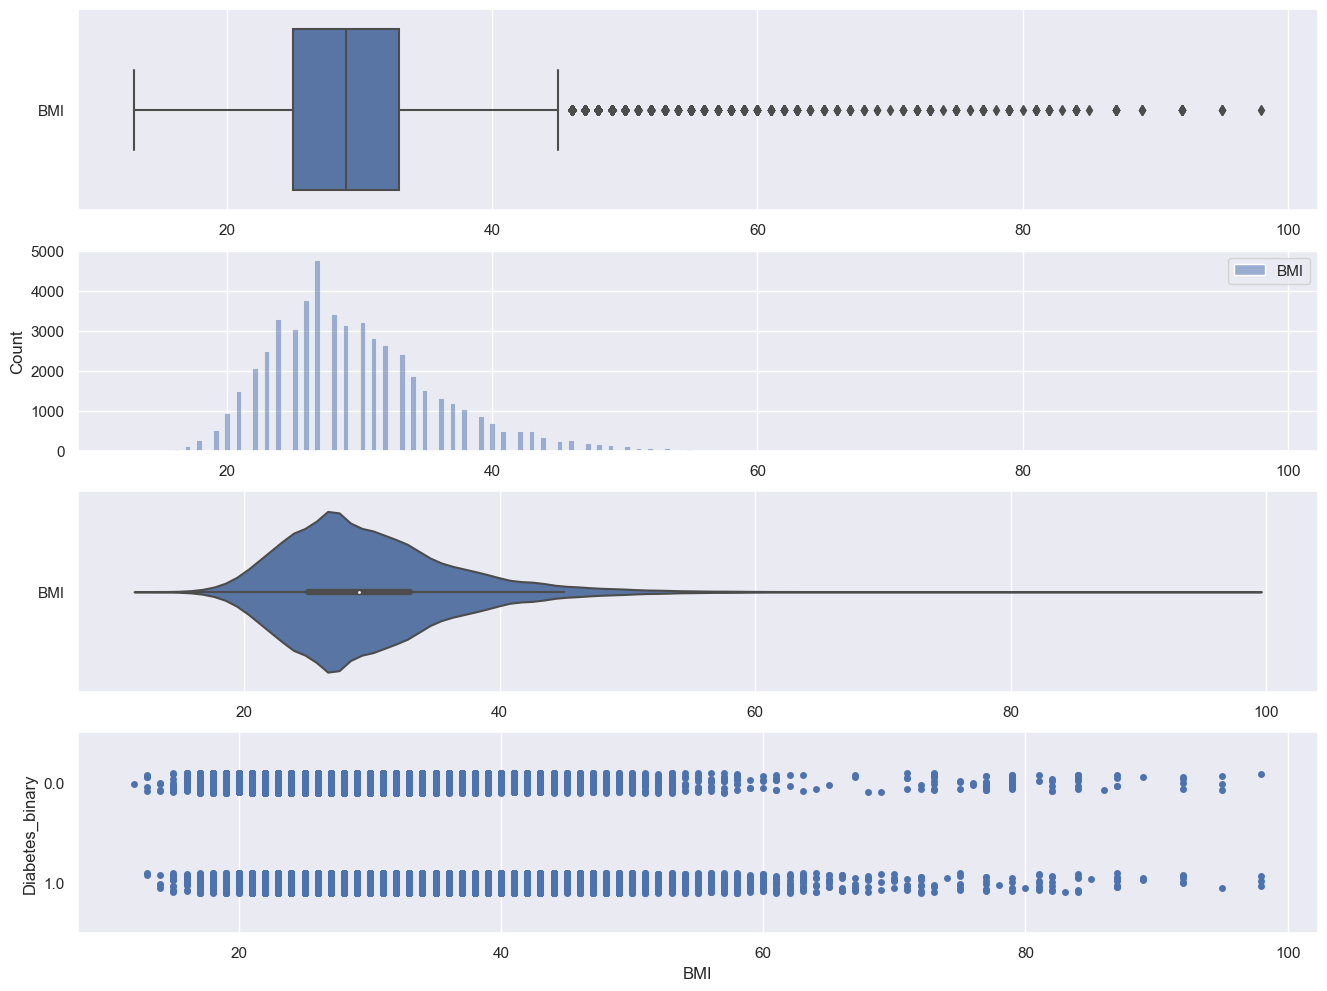

In [13]:

f, axes = plt.subplots(4, 1, figsize=(16, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = BMI_train, orient = "h", ax = axes[0])
sb.histplot(data = BMI_train, ax = axes[1])
sb.violinplot(data = BMI_train, orient = "h", ax = axes[2])

#gives error when x is BMI and y is diabetes
sb.stripplot(x = numeric_data['BMI'], y = numeric_data['Diabetes_binary'], data = BMI_train_DF, orient = "h", ax = axes[3])


In [14]:
#create dataframe
#use skew function
import math
PhysHlth= pd.DataFrame(numeric_data['PhysHlth'])
PhysHlth_log = np.log(PhysHlth + 1)

PhysHlth_train, PhysHlth_test, diabetes_train, diabetes_test = train_test_split(PhysHlth_log, diabetes, test_size = 0.25)
print("DATA SET: [PhysHlth, diabetes binary]")
print("Train Set :", PhysHlth_train.shape, diabetes_train.shape)
print("Test Set  :", PhysHlth_test.shape, diabetes_test.shape)

PhysHlth_train_DF = pd.concat([PhysHlth_train,diabetes_train], axis = 1).reindex(diabetes_train.index)

DATA SET: [PhysHlth, diabetes binary]
Train Set : (53019, 1) (53019, 1)
Test Set  : (17673, 1) (17673, 1)


C:\Users\phuar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\phuar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\phuar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PhysHlth', ylabel='Diabetes_binary'>

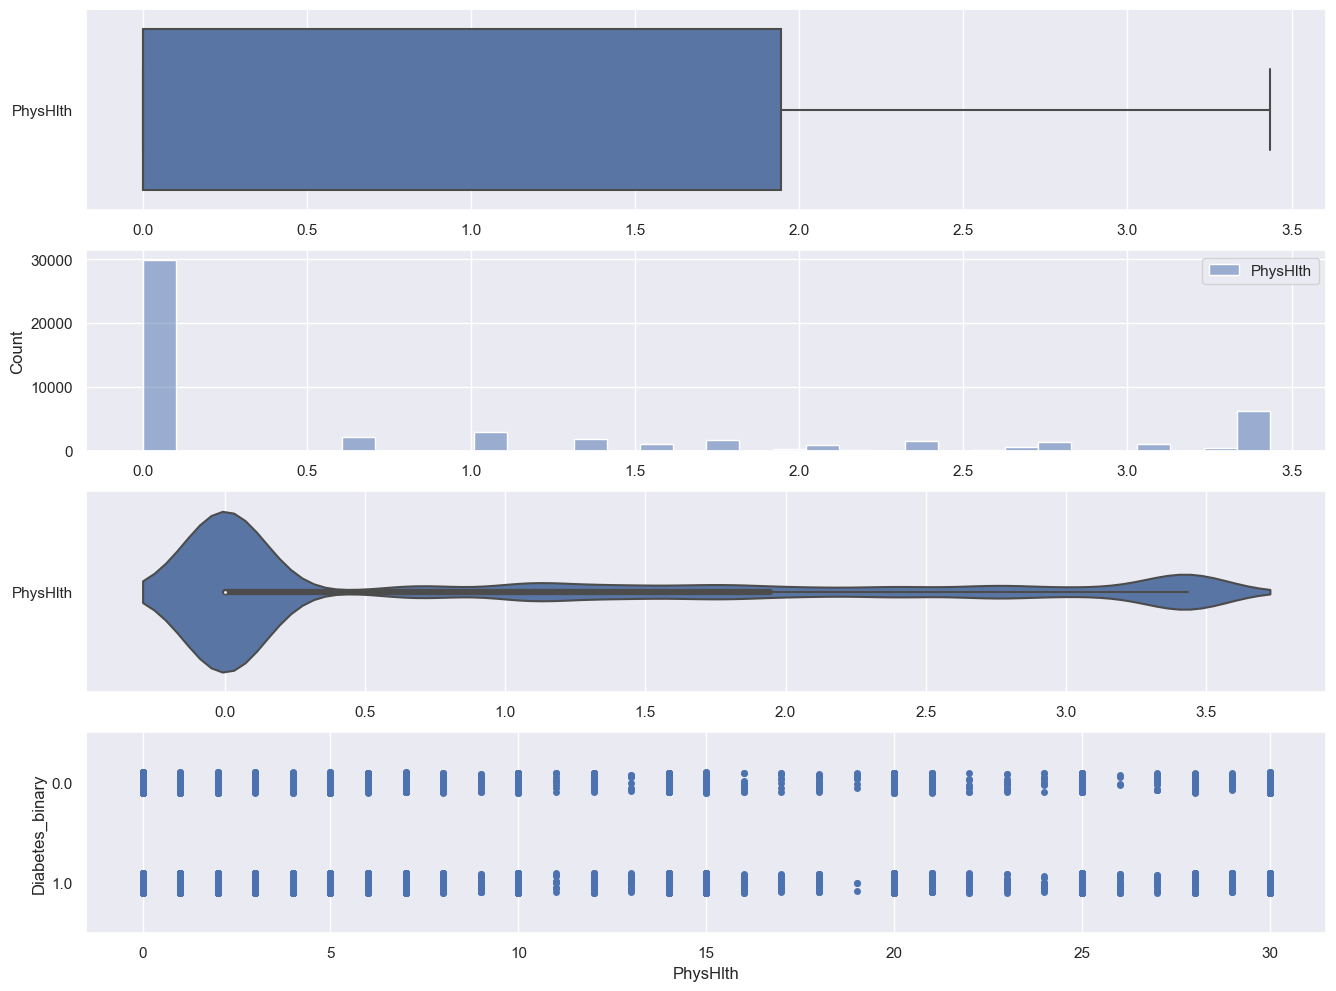

In [15]:
f, axes = plt.subplots(4, 1, figsize=(16, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = PhysHlth_train, orient = "h", ax = axes[0])
sb.histplot(data = PhysHlth_train, ax = axes[1])
sb.violinplot(data = PhysHlth_train, orient = "h", ax = axes[2])
sb.stripplot(x = numeric_data['PhysHlth'], y = numeric_data['Diabetes_binary'], data = PhysHlth_train_DF, orient = "h", ax = axes[3])


[Text(0.4583333333333333, 0.9, 'BMI <= 15.5\ngini = 0.5\nsamples = 53019\nvalue = [26506, 26513]\nclass = diabetes'),
 Text(0.16666666666666666, 0.7, 'BMI <= 13.5\ngini = 0.444\nsamples = 36\nvalue = [12, 24]\nclass = diabetes'),
 Text(0.08333333333333333, 0.5, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = no diabetes'),
 Text(0.25, 0.5, 'BMI <= 14.5\ngini = 0.42\nsamples = 30\nvalue = [9, 21]\nclass = diabetes'),
 Text(0.16666666666666666, 0.3, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = diabetes'),
 Text(0.3333333333333333, 0.3, 'gini = 0.454\nsamples = 23\nvalue = [8, 15]\nclass = diabetes'),
 Text(0.75, 0.7, 'BMI <= 93.5\ngini = 0.5\nsamples = 52983\nvalue = [26494, 26489]\nclass = no diabetes'),
 Text(0.6666666666666666, 0.5, 'BMI <= 26.5\ngini = 0.5\nsamples = 52979\nvalue = [26494, 26485]\nclass = no diabetes'),
 Text(0.5, 0.3, 'BMI <= 21.5\ngini = 0.5\nsamples = 18123\nvalue = [9164, 8959]\nclass = no diabetes'),
 Text(0.4166666666666667, 0.1, 'gini = 0.5\nsamples =

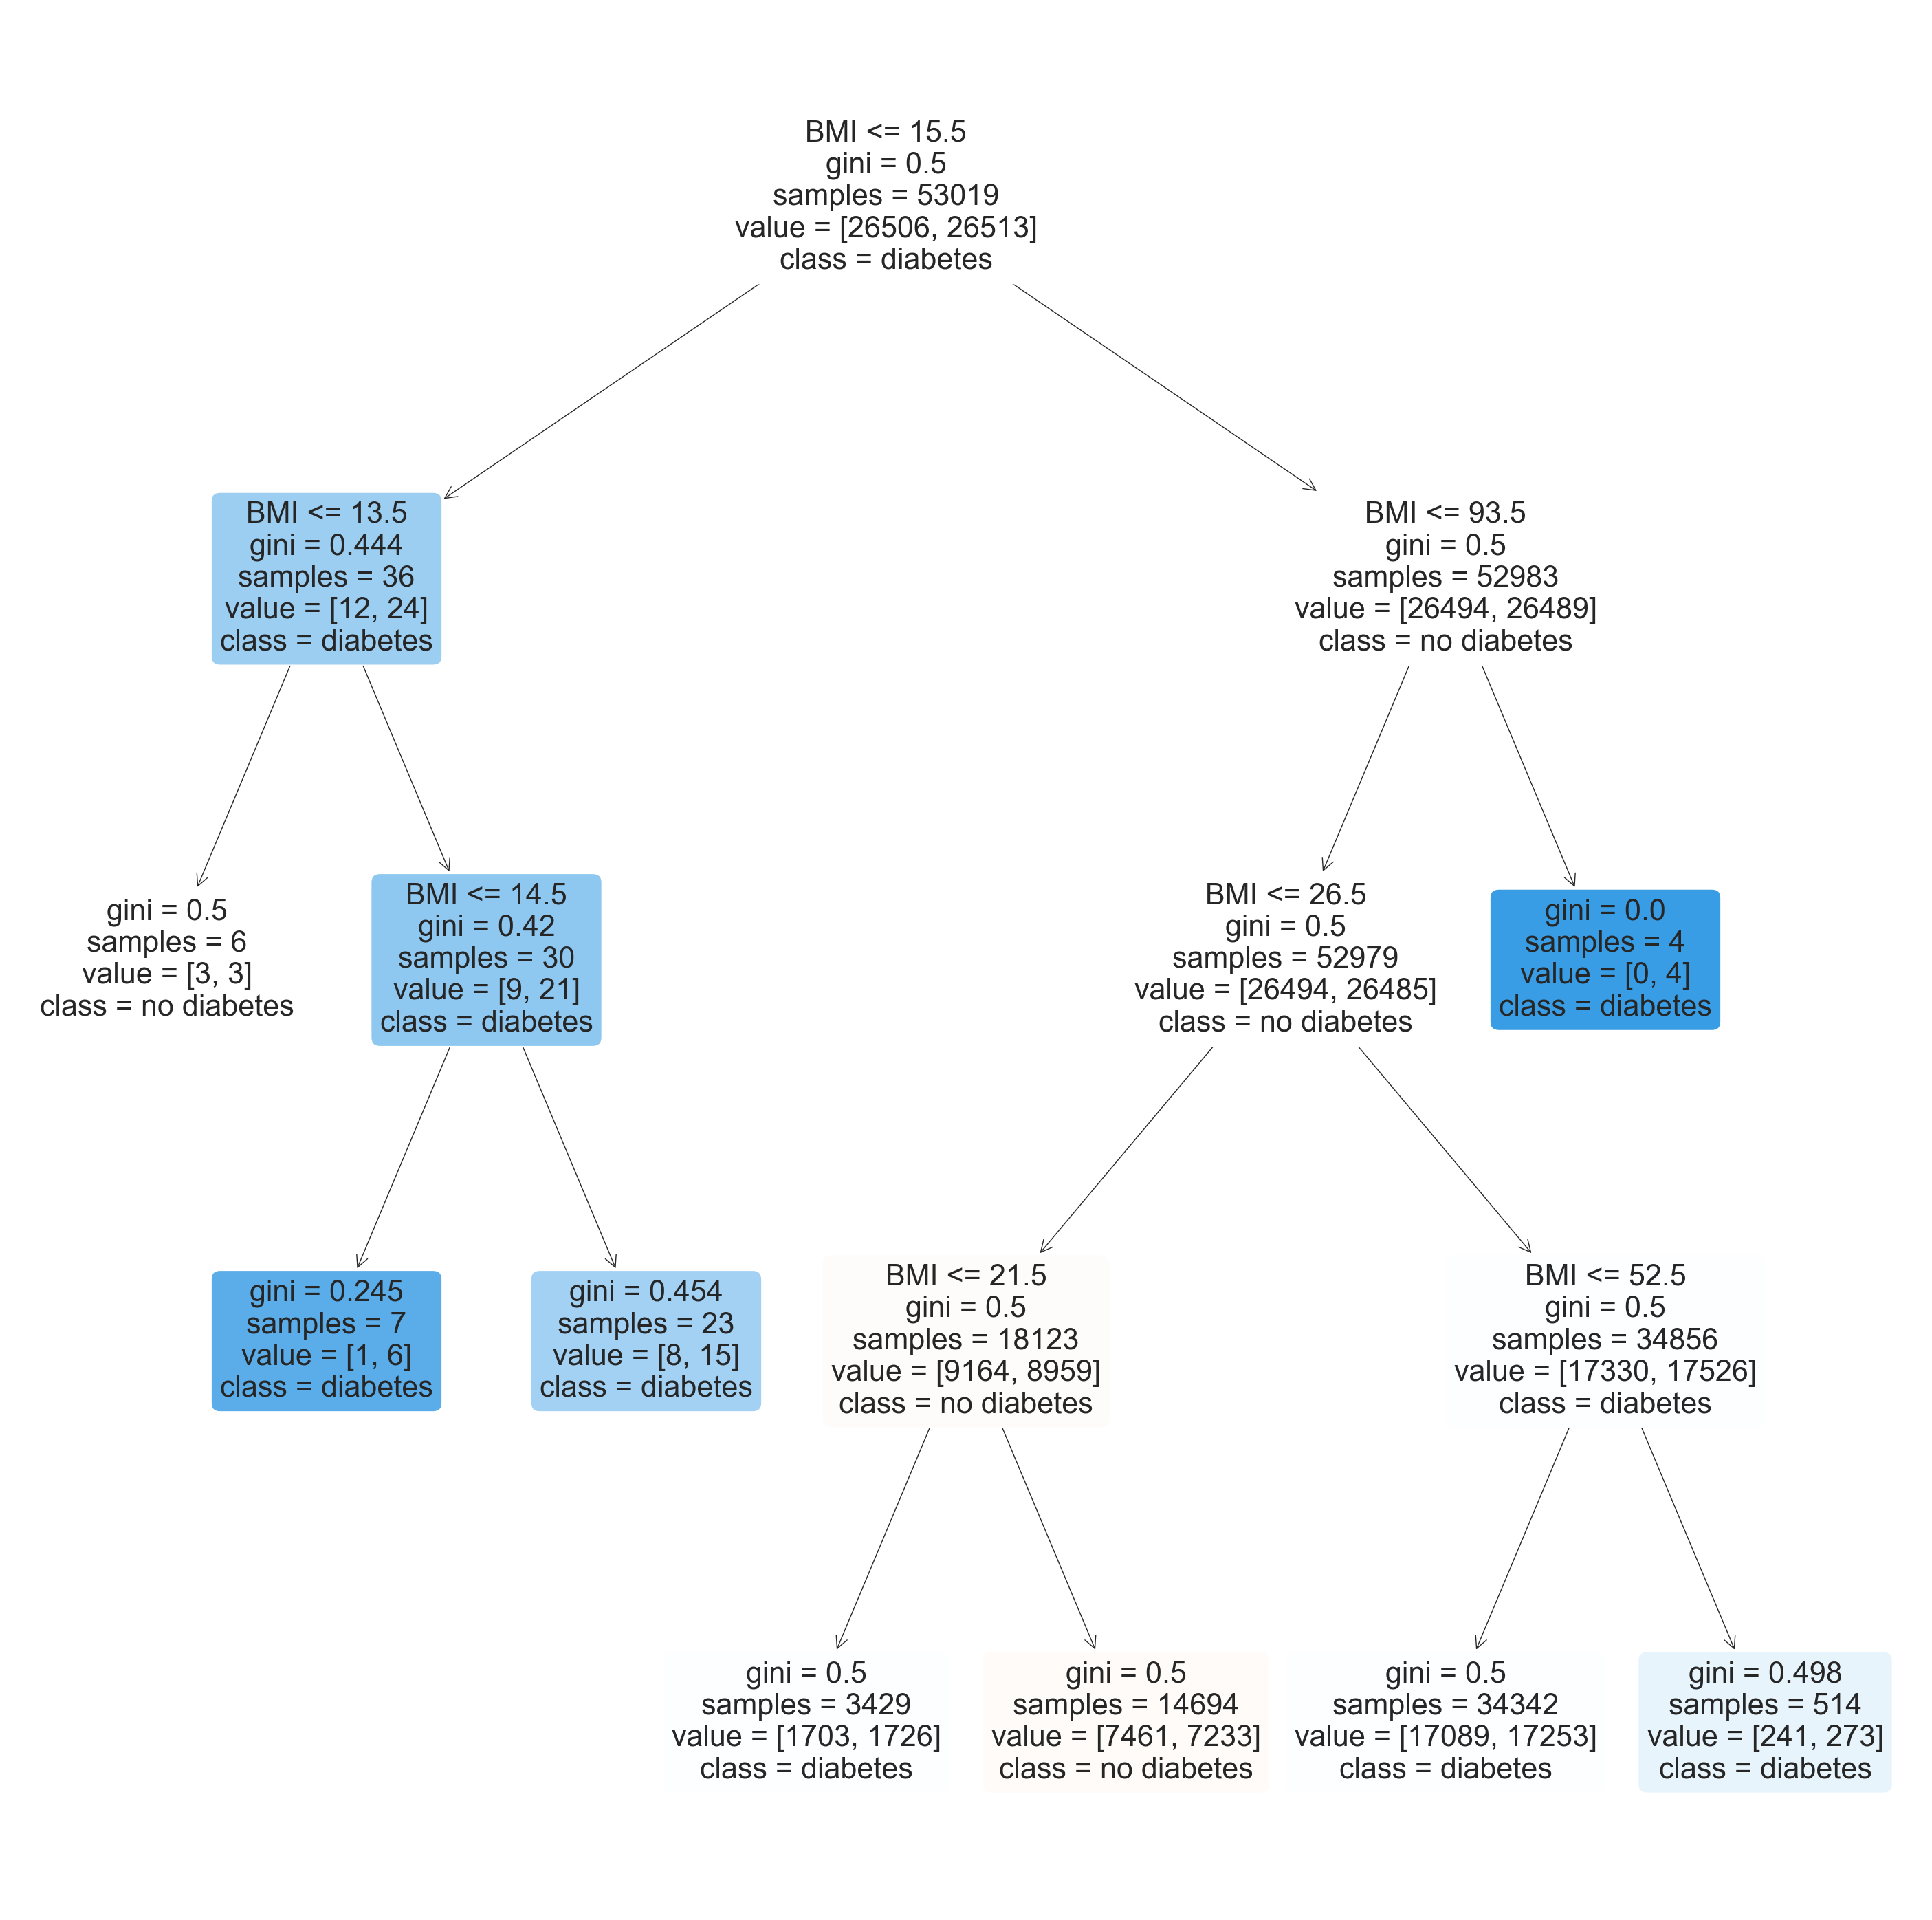

In [16]:
# BMI DEC TREE 
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

# Train the Decision Tree Classifier model
dectree.fit(BMI_train, diabetes_train)

from sklearn.tree import plot_tree

f = plt.figure(figsize=(36,36))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["BMI"], 
          class_names=["no diabetes","diabetes"])

[Text(0.36764705882352944, 0.9166666666666666, 'PhysHlth <= 1.701\ngini = 0.5\nsamples = 53019\nvalue = [26506, 26513]\nclass = diabetes'),
 Text(0.11764705882352941, 0.75, 'PhysHlth <= 0.896\ngini = 0.491\nsamples = 37967\nvalue = [21464, 16503]\nclass = no diabetes'),
 Text(0.058823529411764705, 0.5833333333333334, 'PhysHlth <= 0.347\ngini = 0.487\nsamples = 32046\nvalue = [18601, 13445]\nclass = no diabetes'),
 Text(0.029411764705882353, 0.4166666666666667, 'gini = 0.487\nsamples = 29906\nvalue = [17363, 12543]\nclass = no diabetes'),
 Text(0.08823529411764706, 0.4166666666666667, 'gini = 0.488\nsamples = 2140\nvalue = [1238, 902]\nclass = no diabetes'),
 Text(0.17647058823529413, 0.5833333333333334, 'PhysHlth <= 1.242\ngini = 0.499\nsamples = 5921\nvalue = [2863, 3058]\nclass = diabetes'),
 Text(0.14705882352941177, 0.4166666666666667, 'gini = 0.5\nsamples = 3027\nvalue = [1511, 1516]\nclass = diabetes'),
 Text(0.20588235294117646, 0.4166666666666667, 'PhysHlth <= 1.498\ngini = 0.4

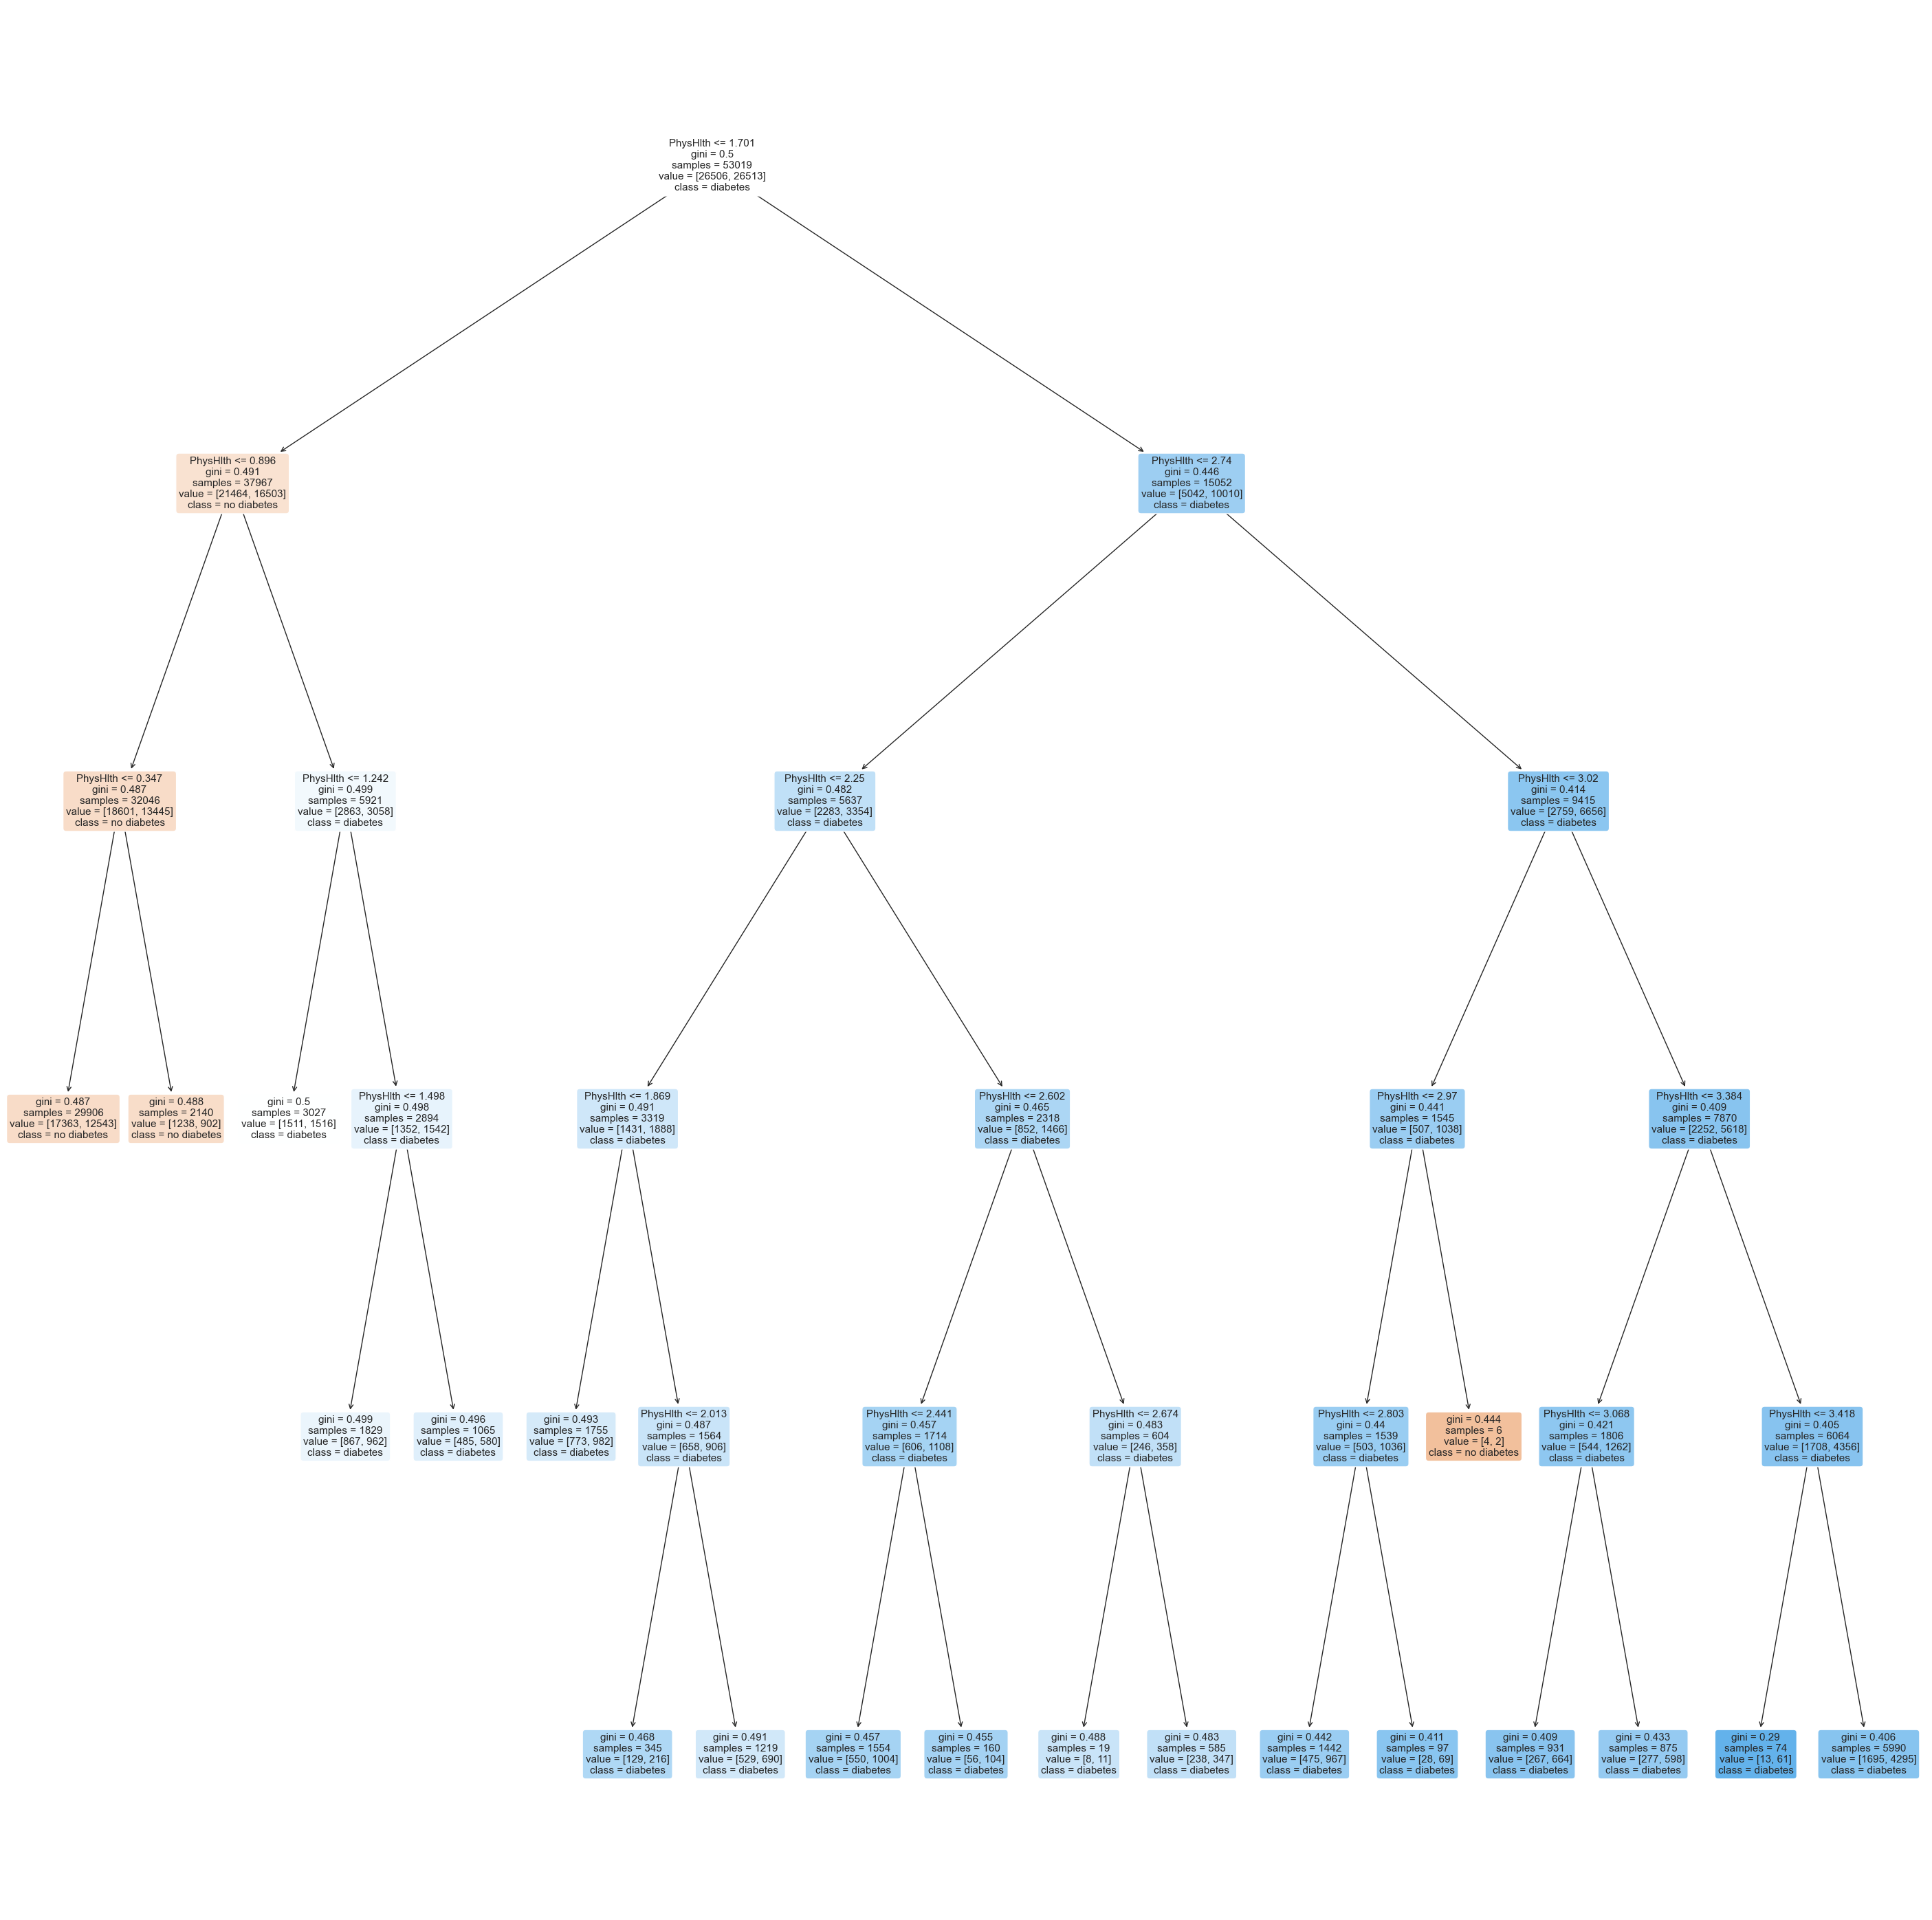

In [17]:
# PHYSHLTH DEC TREE
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 5)

# Train the Decision Tree Classifier model
dectree.fit(PhysHlth_train, diabetes_train)

from sklearn.tree import plot_tree

f = plt.figure(figsize=(36,36))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["PhysHlth"], 
          class_names=["no diabetes","diabetes"])

numerical Data - use logistic regression for numerical to binary and use correlation matrix to evaluate the values

---------------------------------------------------------------------------------------------------------------------------------

## Exploratory Data Analysis - Binary Data

In [ ]:
#use support vector machine 

---------------------------------------------------------------------------------------------------------------------------------

## Exploratory Data Analysis - OneHot Data

In [42]:
temp = pd.DataFrame(oneHot_data[['Age', 'Diabetes_binary']])
age = pd.get_dummies(temp, columns=["Age","Diabetes_binary"])

In [43]:
age

,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Age_5.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0,Age_10.0,Age_11.0,Age_12.0,Age_13.0,Diabetes_binary_0.0,Diabetes_binary_1.0
0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
70688,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
70689,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
70690,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True


In [69]:


from sklearn.cluster import KMeans

kmeans = KMeans(2)
clusters = kmeans.fit_predict(age)
labels = pd.DataFrame(clusters)
labeledAge = pd.concat((age, labels), axis=1)
labeledAge = labeledAge.rename({0: 'labels'}, axis=1)


C:\Users\phuar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [70]:
labeledAge

,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Age_5.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0,Age_10.0,Age_11.0,Age_12.0,Age_13.0,Diabetes_binary_0.0,Diabetes_binary_1.0,labels
0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,1
1,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,1
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,1
3,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,1
4,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,0
70688,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,0
70689,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,0
70690,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,0


In [ ]:

labeledAge['Constant'] = 0  # dummy feature for plotting
num_cols = labeledAge.shape[1]  # Get the number of columns dynamically

f, axes = plt.subplots(1, num_cols, figsize=(25, 7), sharex=False)
f.subplots_adjust(hspace=0.2, wspace=0.7)

for i, col in enumerate(labeledAge.columns):
    if i < num_cols - 1:
        sb.swarmplot(x=col, y='labels', data=labeledAge, ax=axes[i], hue='labels')
    else:
        ax = sb.swarmplot(x=labeledAge['Constant'], y=labeledAge[col], hue=labeledAge['labels'], ax=axes[i])
        ax.set_title(col)

plt.show()

C:\Users\phuar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\phuar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KeyboardInterrupt: 